In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import numpy as np
import tensorflow as tf


In [2]:

from edward.models import Bernoulli, Beta

In [3]:
ed.set_seed(42)

# DATA
x_data = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# MODEL
p = Beta(a=1.0, b=1.0)
x = Bernoulli(p=tf.ones(10) * p)

In [4]:
# INFERENCE
qp_a = tf.nn.softplus(tf.Variable(tf.random_normal([])))
qp_b = tf.nn.softplus(tf.Variable(tf.random_normal([])))
qp = Beta(a=qp_a, b=qp_b)

inference = ed.KLqp({p: qp}, data={x: x_data})
inference.run(n_iter=500)

500/500 [100%] ██████████████████████████████ Elapsed: 1s | Loss: 6.039


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 125.,  186.,  184.,  153.,  117.,   98.,   70.,   38.,   20.,    9.]),
 array([ 0.00253117,  0.08926396,  0.17599675,  0.26272953,  0.34946232,
         0.43619511,  0.52292789,  0.60966068,  0.69639347,  0.78312625,
         0.86985904]),
 <a list of 10 Patch objects>)

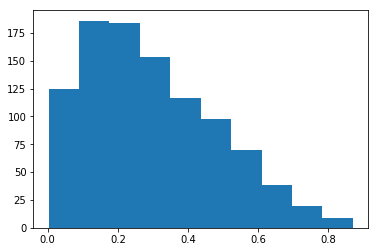

In [7]:
plt.hist(qp.sample(1000).eval())